In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline

## Get data and manioulate

Data is downloaded from the UN databases, live birth table, http://data.un.org/Data.aspx?q=births&d=POP&f=tableCode%3a55

In [73]:
df = pd.read_csv('UNdata_Export_20180610_090813198.csv')

In [74]:
df.head()

,Country or Area,Year,Area,Month,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Finland,2015,Total,Total,Data tabulated by year of occurrence,"Final figure, complete",2017.0,55472.0,NaN
1,Finland,2015,Total,January,Data tabulated by year of occurrence,"Final figure, complete",2017.0,4659.0,NaN
2,Finland,2015,Total,February,Data tabulated by year of occurrence,"Final figure, complete",2017.0,4209.0,NaN
3,Finland,2015,Total,March,Data tabulated by year of occurrence,"Final figure, complete",2017.0,4603.0,NaN
4,Finland,2015,Total,April,Data tabulated by year of occurrence,"Final figure, complete",2017.0,4629.0,NaN


In [75]:
df['Country or Area'].unique()

array(['Finland', 'New Zealand', 'Norway', 'footnoteSeqID', '1'],
      dtype=object)

In [76]:
## only select Norway and New Zealand (want to compare these two)

df = df[df['Country or Area'].isin(['Norway', 'New Zealand'])]

In [77]:
df[df['Country or Area'] == 'New Zealand'].head()

,Country or Area,Year,Area,Month,Record Type,Reliability,Source Year,Value,Value Footnotes
13,New Zealand,2015,Total,Total,Data tabulated by year of registration,"Final figure, complete",2017.0,61038.0,1.0
14,New Zealand,2015,Total,January,Data tabulated by year of registration,"Final figure, complete",2017.0,4962.0,1.0
15,New Zealand,2015,Total,February,Data tabulated by year of registration,"Final figure, complete",2017.0,4587.0,1.0
16,New Zealand,2015,Total,March,Data tabulated by year of registration,"Final figure, complete",2017.0,4962.0,1.0
17,New Zealand,2015,Total,April,Data tabulated by year of registration,"Final figure, complete",2017.0,4866.0,1.0


In [78]:
# store aside and remove row for totals
tot_norway = list(df[(df['Country or Area'] == 'Norway') & (df['Month'] == 'Total')]['Value'])[0]
tot_nz = list(df[(df['Country or Area'] == 'New Zealand') & (df['Month'] == 'Total')]['Value'])[0]

df = df[df['Month'] != 'Total']
df = df[df['Month'] != 'Unknown']

df_norway = df[df['Country or Area'] == 'Norway']
df_nz = df[df['Country or Area'] == 'New Zealand']

tot_norway, tot_nz

(58815.0, 61038.0)

In [79]:
## Add col for the bith monhts / totals

df_norway['month_rate'] = df_norway['Value'] / tot_norway
df_nz ['month_rate'] = df_nz['Value'] / tot_nz

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [80]:
df_norway

,Country or Area,Year,Area,Month,Record Type,Reliability,Source Year,Value,Value Footnotes,month_rate
27,Norway,2015,Total,January,Data tabulated by year of occurrence,"Final figure, complete",2017.0,4760.0,NaN,0.080932
28,Norway,2015,Total,February,Data tabulated by year of occurrence,"Final figure, complete",2017.0,4497.0,NaN,0.076460
29,Norway,2015,Total,March,Data tabulated by year of occurrence,"Final figure, complete",2017.0,4759.0,NaN,0.080915
30,Norway,2015,Total,April,Data tabulated by year of occurrence,"Final figure, complete",2017.0,5113.0,NaN,0.086934
31,Norway,2015,Total,May,Data tabulated by year of occurrence,"Final figure, complete",2017.0,5261.0,NaN,0.089450
32,Norway,2015,Total,June,Data tabulated by year of occurrence,"Final figure, complete",2017.0,5386.0,NaN,0.091575
33,Norway,2015,Total,July,Data tabulated by year of occurrence,"Final figure, complete",2017.0,5630.0,NaN,0.095724
34,Norway,2015,Total,August,Data tabulated by year of occurrence,"Final figure, complete",2017.0,5304.0,NaN,0.090181
35,Norway,2015,Total,September,Data tabulated by year of occurrence,"Final figure, complete",2017.0,4951.0,NaN,0.084179
36,Norway,2015,Total,October,Data tabulated by year of occurrence,"Final figure, complete",2017.0,4800.0,NaN,0.081612


In [81]:
df_nz

,Country or Area,Year,Area,Month,Record Type,Reliability,Source Year,Value,Value Footnotes,month_rate
14,New Zealand,2015,Total,January,Data tabulated by year of registration,"Final figure, complete",2017.0,4962.0,1.0,0.081294
15,New Zealand,2015,Total,February,Data tabulated by year of registration,"Final figure, complete",2017.0,4587.0,1.0,0.075150
16,New Zealand,2015,Total,March,Data tabulated by year of registration,"Final figure, complete",2017.0,4962.0,1.0,0.081294
17,New Zealand,2015,Total,April,Data tabulated by year of registration,"Final figure, complete",2017.0,4866.0,1.0,0.079721
18,New Zealand,2015,Total,May,Data tabulated by year of registration,"Final figure, complete",2017.0,4917.0,1.0,0.080556
19,New Zealand,2015,Total,June,Data tabulated by year of registration,"Final figure, complete",2017.0,4746.0,1.0,0.077755
20,New Zealand,2015,Total,July,Data tabulated by year of registration,"Final figure, complete",2017.0,4992.0,1.0,0.081785
21,New Zealand,2015,Total,August,Data tabulated by year of registration,"Final figure, complete",2017.0,4920.0,1.0,0.080606
22,New Zealand,2015,Total,September,Data tabulated by year of registration,"Final figure, complete",2017.0,5022.0,1.0,0.082277
23,New Zealand,2015,Total,October,Data tabulated by year of registration,"Final figure, complete",2017.0,5364.0,1.0,0.087880


In [91]:
df_norway['month_rate'].sum()
df_nz['month_rate'].sum()

0.9999508502899834

## Plot birth rate per month

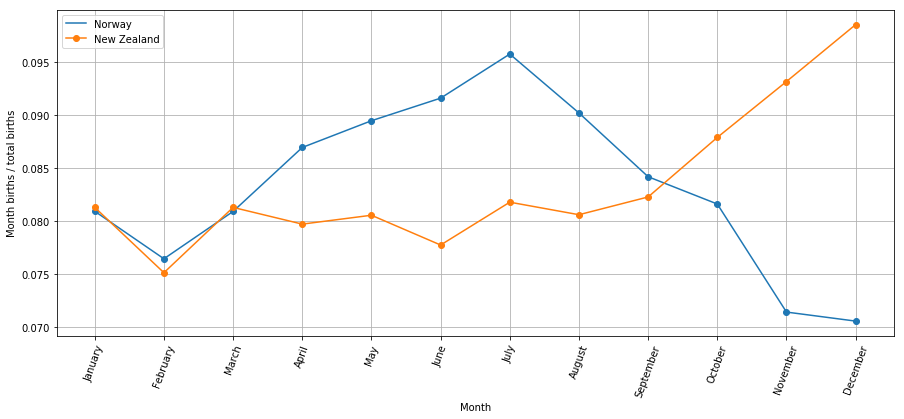

In [89]:
ax = df_norway.plot('Month', 'month_rate', marker='o', label='Norway', figsize=(15, 6))
df_nz.plot('Month', 'month_rate', marker='o', ax=ax, label='New Zealand')

#plt.ylim([0, 0.1])

plt.ylabel('Month births / total births')
plt.grid()
plt.xticks(range(12), df_norway.Month, rotation=70)
plt.show();